# Lista 4
2018/3 

Aluno: Pedro Bandeira de Mello Martins 

Disciplina: CPE773 - Otimização Convexa 

Professor: Wallace A. Martins PEE/COPPE - UFRJ

In [1]:
import sys
if '../..' not in sys.path:
    sys.path.append('../..')
import warnings
warnings.filterwarnings('ignore')
from functions import exercise1116,\
                        question42,\
                        question43,\
                        question44,\
                        question45,\
                        functionObj
from models.optimizers import SteepestDescentAlgorithm,\
                              FletcherReevesAlgorithm,\
                              BacktrackingLineSearch,\
                              FibonacciSearch,\
                              ConjugateGradientAlgorithm,\
                              QuasiNewtonAlgorithm, \
                              BasicNewtonAlgorithm 
from models.utils import UnconstrainProblem
from autograd import numpy as np
from run_exercise import run_exercise

## Questão 1

Para o problema:

minimize 

$f(x) = x_1 + 1.5x_2 + x_3 + x_4$

subject to: 

$x_1 + 2x_2 + x_3 +2x_4 = 3$

$x_1 + x_2 + 2x_3 + 4x_4 = 5$
            
$x_i \geq 0$

In [2]:
f_x, eqc, iqc = exercise1116()
initial_x = np.array([0, 0], dtype=np.float64)

In [3]:
solution = run_exercise(f_x, eqc, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                       plot_charts=False)

QuasiNewtonAlgorithm didn't converge. AssertionError('X out of domain',)


In [4]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm,1.6666676173486707,"[1.3e-06, 0.3333329, 1e-07, 1.1666664]",66536,5042,71578,34.771942
ConjugateGradientAlgorithm,2.371484310972234,"[0.4294677, 0.1901774, 0.8149049, 0.6876363]",6020,6026,12046,152.399383
QuasiNewtonAlgorithm,1.6995341331720812,"[0.007684, 0.330772, 0.0049184, 1.1629268]",82,4109,4191,8.065007
BasicNewtonAlgorithm,1.6666672612346094,"[1e-07, 0.3333333, 1e-07, 1.1666666]",4260,295,4555,3.676602
minimize,1.6667928330904958,"[0.000252, 0.3332493, 7.26e-05, 1.1665884]",390,0,390,0.121659


## Questão 2

Find the shortest distance between the two ellipsis.
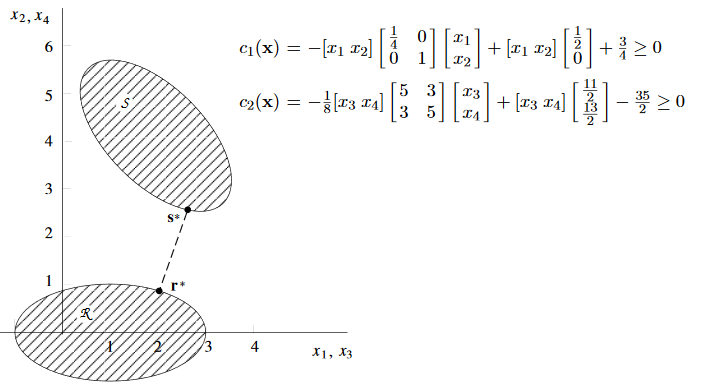

In [5]:
f_x, ineq = question42()
f_obj = functionObj(f_x, iqc=ineq)
initial_x = np.array([0, 0,2,4], dtype=np.float64)


In [6]:
from scipy.optimize import minimize
x0 = initial_x
while f_obj.niq/f_obj.smooth_log_constant > 1e-6:
    res = minimize(fun=f_obj, x0=x0)
    if f_obj._has_eqc:
        x0 = f_obj.best_z
    else:
        x0 = f_obj.best_x
    f_obj.smooth_log_constant *= 20
print(res)

      fun: -1.9676745282036744e-05
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([-5.92285687e-08,  4.25855433e-07,  1.90517994e-07,  2.73553042e-07])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 1
     njev: 3
   status: 0
  success: True
        x: array([1.32052862, 0.15404169, 1.32052919, 0.15404249])


In [7]:
UnconstrainProblem(f_obj, initial_x, QuasiNewtonAlgorithm).find_min()

[1.2839218173106408,
 0.10162961030265973,
 1.3571360023432197,
 0.20645457593228725]

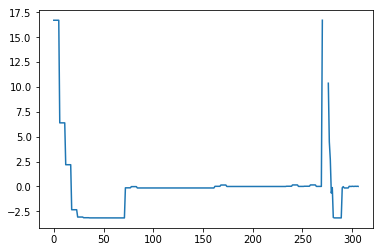

In [8]:
import matplotlib.pyplot as plt
plt.plot(f_obj.all_evals)

## Questão 3
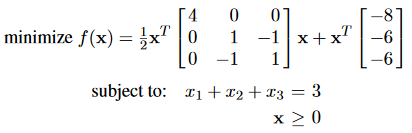

In [9]:
f_x, eqc, iqc = question43()
initial_x = np.array([0, 0], dtype=np.float64)

In [10]:
solution = run_exercise(f_x, eqc, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                        maxIter = 500,
                       plot_charts=False)

In [11]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm,-18.492817258340683,"[0.5599278, 1.2200361, 1.2200361]",9787,3000,12787,12.001806
ConjugateGradientAlgorithm,-18.499999922841226,"[0.5000028, 1.2499986, 1.2499986]",17,17,34,0.306705
QuasiNewtonAlgorithm,-18.499999920058514,"[0.5000375, 1.2499813, 1.2499813]",19,6015,6034,17.047743
BasicNewtonAlgorithm,-18.499999922856247,"[0.5000001, 1.25, 1.25]",309,39,348,0.516720
minimize,-18.499998457131547,"[0.5000019, 1.2499991, 1.2499991]",76,0,76,0.022630


## Questão 4
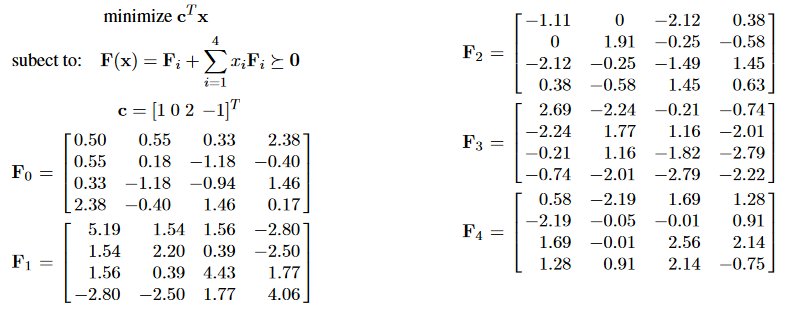

In [12]:
f_x, iqc = question44()
find_feasible_f = functionObj(lambda x: np.ones_like(x)@x, iqc=iqc)
x0 = np.array([-10, -10, -10, -10], dtype=np.float64)
initial_x = x0
#initial_x = UnconstrainProblem(find_feasible_f, x0, ConjugateGradientAlgorithm, maxIter=200).find_min()
#print(initial_x, find_feasible_f.func(initial_x))

In [13]:
solution = run_exercise(f_x, None, iqc,
             [(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)],
                        initial_x,
                        maxIter = 500,
                       plot_charts=False)

QuasiNewtonAlgorithm didn't converge. AssertionError('X out of domain',)


In [14]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm,-1.66441e+06,"[1258850.8563775, -183626.6962559, -1062015.53...",12585,3000,15585,46.845014
ConjugateGradientAlgorithm,-2.6946e+16,"[-4490999999982770.0, -1763.5457186, -89819999...",3000,3006,6006,243.504364
QuasiNewtonAlgorithm,inf,"[-11.0, -10.0, -12.0, -9.0]",3,5,8,0.050863
BasicNewtonAlgorithm,-3.51695e+06,"[-676401.107341, 10775.3465805, -1142527.67758...",25782,3000,28782,230.130384
minimize,inf,"[-10.0, -10.0, -10.0, -10.0]",30,0,30,0.006337


## Questão 5
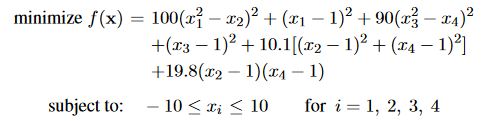

In [15]:
f_x, iqc = question45()
initial_x = np.array([-2,2, -2,2], dtype=np.float64)

In [16]:
optimizers =[(SteepestDescentAlgorithm, BacktrackingLineSearch), 
              ConjugateGradientAlgorithm, 
              QuasiNewtonAlgorithm, 
              (BasicNewtonAlgorithm, BacktrackingLineSearch)]
#optimizers = [QuasiNewtonAlgorithm]
solution = run_exercise(f_x, None, iqc,
                        optimizers,
                        initial_x,
                        maxIter = 500,
                       plot_charts=False)

In [17]:
solution[['best_f', 'best_x', 'fevals', 'grad_evals', 'nevals', 'run_time (s)']]

,best_f,best_x,fevals,grad_evals,nevals,run_time (s)
SteepestDescentAlgorithm,2.06003,"[0.0876612, 0.0186786, -1.3646676, 1.874765]",101846,3500,105346,53.412785
ConjugateGradientAlgorithm,-6.04245,"[0.0948673, -0.0076532, -1.4588238, 2.1381249]",3500,3507,7007,86.006689
QuasiNewtonAlgorithm,-8.78959,"[0.9969363, 0.9941147, -0.9987022, 0.9977018]",129,7083,7212,29.834483
BasicNewtonAlgorithm,0.0241815,"[0.9392521, 0.8792441, -1.0549196, 1.1105251]",79198,3500,82698,116.949969
minimize,-8.78959,"[0.9968323, 0.9939374, -0.9988199, 0.9979239]",984,0,984,0.311332
